In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import re
import time
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

import numpy as np # linear algebra
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

0 : Neutral Sentiment

1 : Positive Sentiment

2 : Negative Sentiment
(Words that don't mention the ITE Law or the Criminal Code, Ex: I'm lazy to go anywhere)

3 : Insulting the Government or Public Agency
(Pasal 207 KUHP: “Barang siapa dengan sengaja dimuka umum, dengan lisan atau tulisan menghina kekuasaan yang ada di Negara Indonesia atau sesuatu majelis umum yang ada di sana, dihukum penjara selama-lamanya satu tahun enam bulan atau denda sebanyak-banyaknya Rp4.500.000”
and
Pasal 208 KUHP: “Barang siapa menyiapkan, mempertontonkan atau menempelkan tulisan atau gambar yang isinya penghinaan bagi sesuatu kekuasaan yang ada di Negara Indonesia atau bagi sesuatu mejelis umum yang ada di sana, dengan niat supaya isi yang menghina itu diketahui oleh orang banyak atau lebih diketahui oleh orang banyak, di hukum penjara paling lama 4 bulan atau denda sebanyak Rp 4.500.000”)

4: Insulting or Defaming Others
(Pasal 27 ayat (3) UU ITE berbunyi sebagai berikut: “Setiap Orang dengan sengaja dan tanpa hak mendistribusikan dan/atau mentransmisikan dan/atau membuat dapat diaksesnya Informasi Elektronik dan/atau Dokumen Elektronik yang memiliki muatan penghinaan dan/atau pencemaran nama baik.”)

5 : Threatening Others
(Pasal 29 UU ITE, bunyi pasalnya sebagai berikut: “Setiap Orang dengan sengaja dan tanpa hak mengirimkan Informasi Elektronik dan/atau Dokumen Elektronik yang berisi ancaman kekerasan atau menakut-nakuti yang ditujukan secara pribadi.”)

6 : Alluding to the Tribe, Religion, Race and intergroup
(Pasal 28 ayat (2) UU ITE: “Setiap Orang dengan sengaja dan tanpa hak menyebarkan informasi yang ditujukan untuk menimbulkan rasa kebencian atau permusuhan individu dan/atau kelompok masyarakat tertentu berdasarkan atas suku, agama, ras, dan antargolongan (SARA).”)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_twitter = pd.read_csv('/content/drive/MyDrive/Dataset Twitter Fix - Indonesian Sentiment Twitter Dataset Labeled (1).csv')
df_twitter.sample(10)

,sentimen,Tweet
2038,0.0,simpel gini 1997 beras di lampung 1 600 2rb um...
8612,4.0,"Bacot apanya, gue ngulang perkataan gue gegara..."
9114,2.0,Daripada bacot ini itu dan menyakiti orang lai...
8991,2.0,Akhirnya dapet pencerahan jg soal Adora-Hilman...
8133,4.0,HAHAHA gakdeng. nyaman lah cerita cerita sama ...
6931,1.0,kerja keras dan prestasi yang membanggakan ter...
5479,1.0,sesungguhnya penguasaan diri adalah penanda da...
5144,0.0,maaf kak ini kita diajarin ka saktia kalo kata...
11755,5.0,liat aja ntar malem bakal abis lu sama gua
5259,0.0,Stay safe and comeback stronger membuka donasi...


DATA CLEANING

In [4]:
pd.isna(df_twitter).sum()

sentimen    1
Tweet       0
dtype: int64

In [5]:
df_twitter.loc[:, df_twitter.isna().any()]

,sentimen
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
12642,6.0
12643,6.0
12644,6.0
12645,6.0


In [6]:
data_twit = df_twitter.dropna()
data_twit

,sentimen,Tweet
0,0.0,barusan liat tulisan di belakang truk rela inj...
1,0.0,her itu lho miss kevin sama keven rebutan gimb...
2,0.0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0.0,aku mohon tepatilah janjimu penantiancintaeps19
4,0.0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
12642,6.0,"Jangan dibahas dong, udah paham aja kan di kau..."
12643,6.0,di agama lo nyembah nya siapa sih? masa Tuhan ...
12644,6.0,"Katanya demi kemanusiaan, kemanusiaan milik ma..."
12645,6.0,Orang timur kurang pintar dari orang barat


PLOTTING

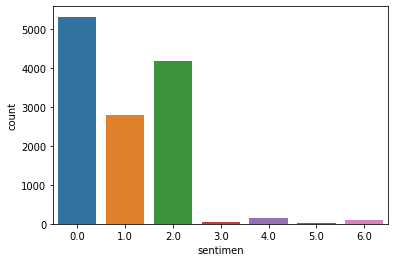

In [7]:
import seaborn as sns
sns.countplot(data=data_twit, x='sentimen')

the plot shows that neutral sentiment which labeled as 0 is the higher, followed by sentiment labeled as 2 in second place in another word negative sentiment in second place.

In [8]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [9]:
data_twit['Tweet'] = data_twit['Tweet'].apply(cleanTxt)
data_twit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sentimen,Tweet
0,0.0,barusan liat tulisan di belakang truk rela inj...
1,0.0,her itu lho miss kevin sama keven rebutan gimb...
2,0.0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0.0,aku mohon tepatilah janjimu penantiancintaeps19
4,0.0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
12642,6.0,"Jangan dibahas dong, udah paham aja kan di kau..."
12643,6.0,di agama lo nyembah nya siapa sih? masa Tuhan ...
12644,6.0,"Katanya demi kemanusiaan, kemanusiaan milik ma..."
12645,6.0,Orang timur kurang pintar dari orang barat


In [10]:
data_twit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12646 entries, 0 to 12646
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sentimen  12646 non-null  float64
 1   Tweet     12646 non-null  object 
dtypes: float64(1), object(1)
memory usage: 812.4+ KB


In [20]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=12646,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data_twit['Tweet']))

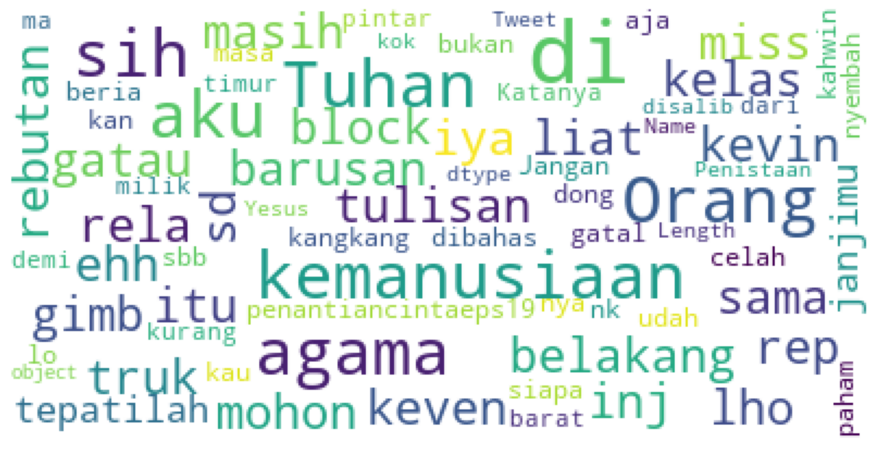

In [22]:
print(wordcloud)
fig = plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

WORD CLOUD OF TWITTER SENTIMENT 